In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import os
print(os.listdir("../input"))

dataset = pd.read_csv("../input/train.csv")
y = dataset.iloc[:,0].values
x = dataset.iloc[:,1:].values.reshape(-1,28,28,1)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0,test_size = 0.2)


['train.csv', 'sample_submission.csv', 'test.csv']


In [2]:
x_train = x_train/255.0
x_test = x_test/255.0

In [3]:
import tensorflow as tf
from tensorflow import keras

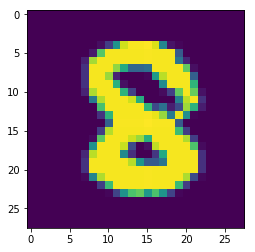

In [4]:
plt.imshow(x_train[1121][:,:,0])

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28,1)),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax')
])

In [6]:
model.compile(optimizer = 'Adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [7]:
model.fit(x_train,y_train,epochs = 20)

Epoch 1/20
33600/33600 [==============================] - 2s 64us/sample - loss: 0.3210 - acc: 0.9082
Epoch 2/20
33600/33600 [==============================] - 2s 59us/sample - loss: 0.1442 - acc: 0.9571
Epoch 3/20
33600/33600 [==============================] - 2s 59us/sample - loss: 0.0970 - acc: 0.9721
Epoch 4/20
33600/33600 [==============================] - 2s 59us/sample - loss: 0.0718 - acc: 0.9790
Epoch 5/20
33600/33600 [==============================] - 2s 60us/sample - loss: 0.0545 - acc: 0.9844
Epoch 6/20
33600/33600 [==============================] - 2s 59us/sample - loss: 0.0409 - acc: 0.9878
Epoch 7/20
33600/33600 [==============================] - 2s 59us/sample - loss: 0.0346 - acc: 0.9899
Epoch 8/20
33600/33600 [==============================] - 2s 59us/sample - loss: 0.0256 - acc: 0.9930
Epoch 9/20
33600/33600 [==============================] - 2s 59us/sample - loss: 0.0214 - acc: 0.9938
Epoch 10/20
33600/33600 [==============================] - 2s 59us/sample - loss: 

In [8]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis = 1)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred)
print(acc)

0.9748809523809524


In [9]:
test = pd.read_csv("../input/test.csv")
test = test.iloc[:,:].values.reshape(-1,28,28,1)
y_d = model.predict(test)
y_d = np.argmax(y_d,axis = 1)
print(y_d)
sub = pd.read_csv("../input/sample_submission.csv")
my_submission = pd.DataFrame({'ImageId':sub.ImageId,'Label': y_d})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)

[2 0 9 ... 3 9 2]
